In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

The first step in our pre-processing is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it. We will use haar cascade from opencv for this.

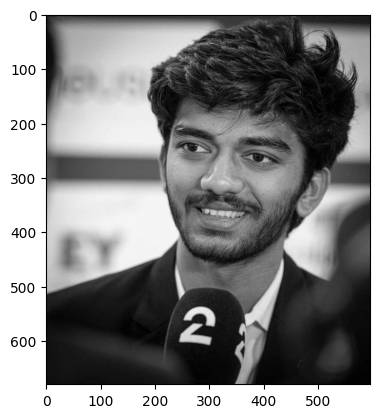

In [4]:
img = cv2.imread('./test_images/gukesh.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

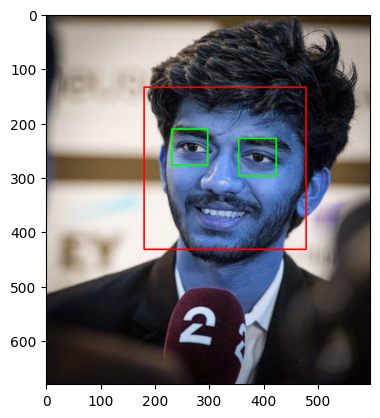

In [5]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

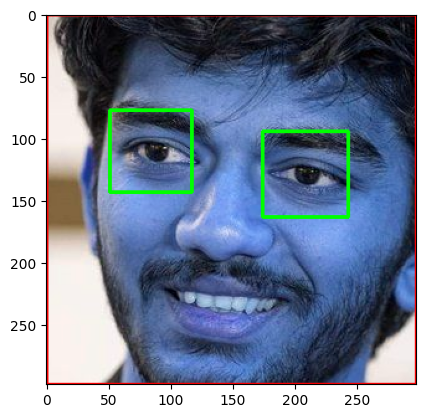

In [6]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
cropped_img = np.array(roi_color)

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc.wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

In [7]:
import pywt
    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

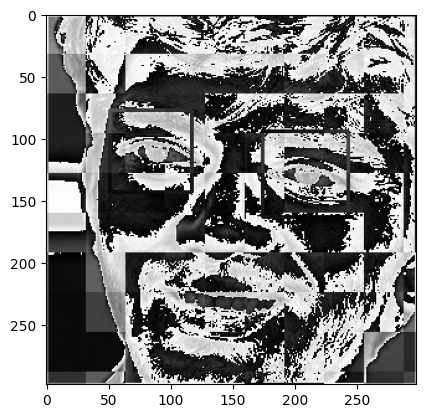

In [8]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [9]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [10]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [11]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/chritiano_ronaldo',
 './dataset/gukesh',
 './dataset/neeraj_chopra',
 './dataset/pv_sindhu',
 './dataset/shubhman_gill']

In [12]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [13]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/chritiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/gukesh
Generating cropped images in folder:  ./dataset/cropped/neeraj_chopra
Generating cropped images in folder:  ./dataset/cropped/pv_sindhu
Generating cropped images in folder:  ./dataset/cropped/shubhman_gill


Now you should have cropped folder under datasets folder that contains cropped images
Manually examine cropped folder and delete any unwanted images

In [14]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'chritiano_ronaldo': ['./dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo1.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo10.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo11.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo12.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo13.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo14.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo15.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo16.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo17.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo18.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo19.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo2.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo20.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo21.png',
  './dataset/cropped/chritiano_ronaldo\\chritiano_ronaldo

In [15]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'chritiano_ronaldo': 0,
 'gukesh': 1,
 'neeraj_chopra': 2,
 'pv_sindhu': 3,
 'shubhman_gill': 4}

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [16]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

We will use SVM with rbf kernel tuned with heuristic finetuning

In [47]:
import sklearn
print("sklearn version:", sklearn.__version__)
sklearn.set_config(enable_metadata_routing=True)
print("routing enabled?:", sklearn.get_config()["enable_metadata_routing"])

sklearn version: 1.7.1
routing enabled?: True


In [51]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(119, 4096)

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6333333333333333

In [54]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.86      0.86      0.86         7
           2       0.67      0.67      0.67         6
           3       1.00      0.60      0.75         5
           4       0.40      1.00      0.57         4

    accuracy                           0.63        30
   macro avg       0.68      0.67      0.64        30
weighted avg       0.69      0.63      0.62        30



In [55]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [56]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [57]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\MLpowered_ImageClassifier\model\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\MLpowered_ImageClassifier\model\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\MLpowered_ImageClassifier\model\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\MLp

,model,best_score,best_params
0,svm,0.708497,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.606536,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.719608,{'logisticregression__C': 10}


In [58]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, multi_class='auto',
                                     solver='liblinear'))])}

In [59]:
best_estimators['svm'].score(X_test,y_test)

0.7333333333333333

In [60]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7666666666666667

In [61]:
best_estimators['random_forest'].score(X_test,y_test)

0.5666666666666667

In [62]:
best_clf = best_estimators['svm']

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))

Text(95.72222222222221, 0.5, 'Truth')

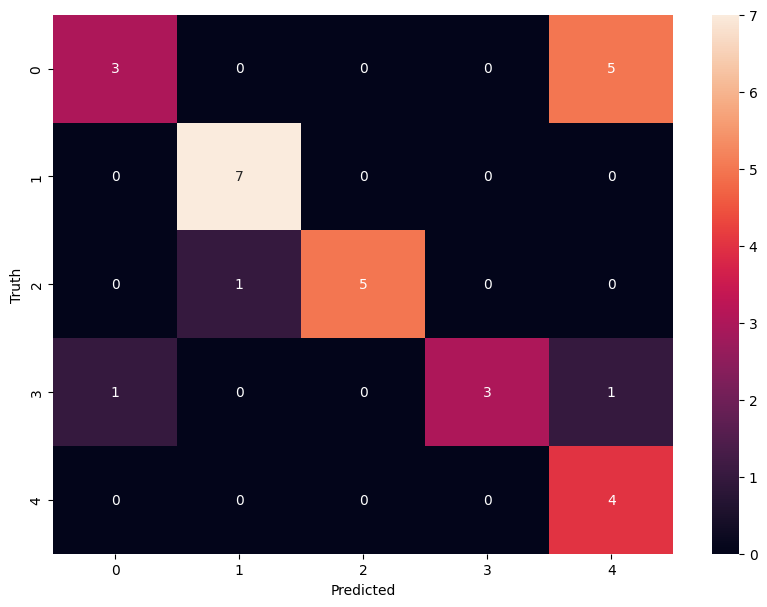

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
class_dict

{'chritiano_ronaldo': 0,
 'gukesh': 1,
 'neeraj_chopra': 2,
 'pv_sindhu': 3,
 'shubhman_gill': 4}

In [66]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [67]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))